In [1]:
import nltk
from nltk.tokenize import MWETokenizer
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels
%matplotlib inline

In [2]:
conditions = pd.read_csv('conditions.txt', sep='|')
conditions.head()

,CONDITION_ID,NCT_ID,CONDITION
0,150,NCT00000262,Substance-Related Disorders
1,151,NCT00000263,Opioid-Related Disorders
2,152,NCT00000263,Substance-Related Disorders
3,153,NCT00000264,Opioid-Related Disorders
4,154,NCT00000264,Substance-Related Disorders


In [3]:
def apply_word_tokenize(x):
    """ Tokenize 
        :param: x (str)
        :return: token (list of str)
    """
    words = nltk.word_tokenize(x.lower())
    return words


In [10]:
conditions['CONDITION'].value_counts()[91:100]

Traumatic Brain Injury        427
Bladder Cancer                420
Non-small Cell Lung Cancer    418
Smoking Cessation             417
Chronic Pain                  411
Spinal Cord Injury            394
Dementia                      391
Myelodysplastic Syndrome      385
Non-Small Cell Lung Cancer    380
Name: CONDITION, dtype: int64

In [4]:
tokens = [apply_word_tokenize(x) for x in conditions['CONDITION']]

In [5]:
tokens[0:5]

[['substance-related', 'disorders'],
 ['opioid-related', 'disorders'],
 ['substance-related', 'disorders'],
 ['opioid-related', 'disorders'],
 ['substance-related', 'disorders']]

In [19]:
categories = {'Addiction':['Substance-Related', 'Opioid-Related', 'Smoking',
                          'Smoking Cessation'],
             'Cancer': ['Breast Cancer', 'Prostate Cancer', 'Colorectal Cancer', 'Lung Cancer',
                       'Lymphoma', 'Leukemia', 'Cancer', 'Ovarian Cancer', 'Pancreatic Cancer',
                       'Head and Neck Cancer', 'Melanoma', 'Gastric Cancer'
                        'Unspecified Adult Solid Tumor, Protocol Specific',
                       'Neoplasms', 'Myelodysplastic Syndromes',
                       'Esophageal Cancer', 'Solid Tumors', 
                        'Sarcoma', 'Hepatocellular Carcinoma', 'Cervical Cancer',
                       'Brain and Central Nervous System Tumors', 'Breast Neoplasms',
                       'Acute Myeloid Leukemia', 'Bladder Cancer',
                       'Non-small Cell Lung Cancer', 'Non-Small Cell Lung Cancer', 
                        'Myelodysplastic Syndrome'],
             'Auto-immunity and Inflammation': ['Rhematoid Arthritis', 'Asthma', 'Osteoarthritis',
                                           'Multiple Sclerosis', 'Inflammation',
                                           "Crohn's Disease", 'Psoriasis',
                                           'Ulcerative Colitis', 'COPD'],
             'Heart Disease and Stroke': ['Hypertension', 'Coronary Artery Disease', 'Stroke',
                                         'Cardiovascular Diseases', 'Atrial Fibrillation', 
                                         'Heart Diseases', 'Cardiovascular Disease',
                                         'Myocardial Infarction',
                                         'Pulmonary Disease, Chronic Obstructive',
                                         'Coronary Disease', 'Atherosclerosis'],
             'Diabetes': ['Diabetes', 'Diabetes Mellitus, Type 2', 'Type 2 Diabetes', 
                          'Type 2 Diabetes Mellitus' 'Diabetes Mellitus', 'Insulin Resistance',
                         'Diabetes Mellitus, Type 1'],
             'Mental Health': ['Depression', 'Schizophrenia', 'Major Depressive Disorder',
                              'Bipolar Disorder' 'Anxiety'],
              'Neurodegenerative': ['Dementia', "Parkinson's Disease", "Alzheimer's Disease"],
             'Pain': ['Pain', 'Fibromyalgia', 'Postoperative Pain', "Low Back Pain", 
                      'Chronic Pain'],
             'Healthy': ['Healthy', 'Healthy Subjects', 'Healthy Volunteers'],
             'Obesity': ['Obesity', 'Overweight', 'Metabolic Syndrome'],
              'Pregnancy/Fertility': ['Pregnancy', 'Infertility'],
             'Infectious Diseases': ['Malaria', 'Hepatitis C', 'HIV Infections', 'HIV',
                                    'HIV Infection', 'Tuberculosis']}

In [20]:
def tokenize_and_count(df, colname, categories):
    """ First use get_synonyms to help make categories"""
    
    tokenized = [nltk.word_tokenize(x) for x in df[colname]] #this is slow
    
    counted = defaultdict(int)
    
    for cat in categories.keys():
        for token in tokenized:
             for label in categories[cat]:
                if label in token:
                    counted[cat] +=1
    return dict(counted)

In [21]:
diseases = tokenize_and_count(conditions, 'CONDITION', categories)
diseases

{'Addiction': 1430,
 'Auto-immunity and Inflammation': 7139,
 'Cancer': 58238,
 'Diabetes': 9515,
 'Healthy': 8074,
 'Heart Disease and Stroke': 7002,
 'Infectious Diseases': 6483,
 'Mental Health': 4464,
 'Neurodegenerative': 641,
 'Obesity': 4919,
 'Pain': 7018,
 'Pregnancy/Fertility': 2278}

[None, None, None, None, None, None, None]

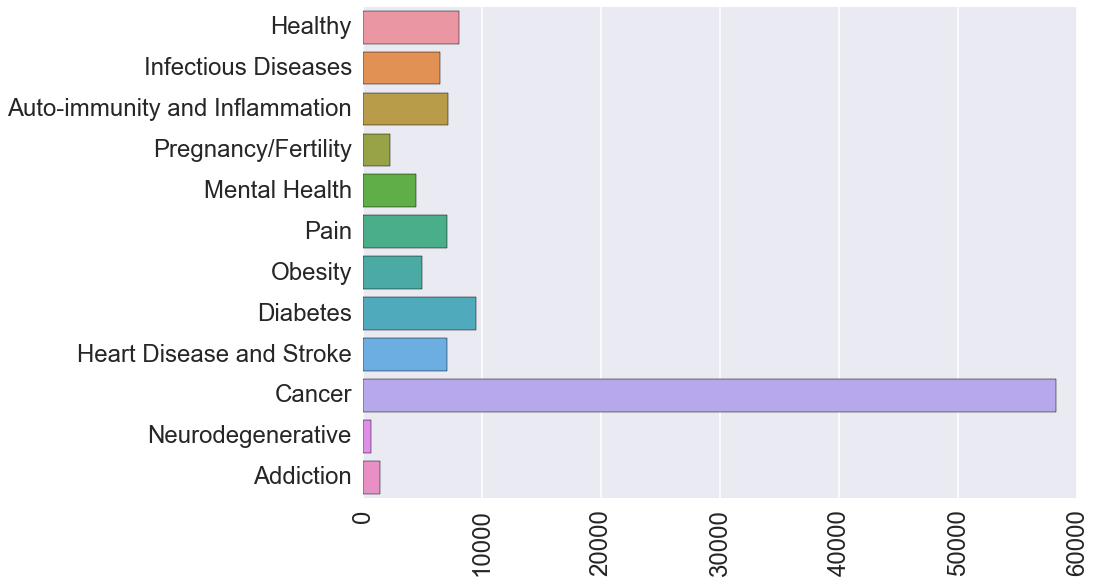

In [22]:
sns.set_context('poster', font_scale=1.5)
sns.barplot(list(diseases.values()), list(diseases.keys()))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [23]:
conditions.shape

(340351, 3)